<a href="https://colab.research.google.com/github/badriadhikari/2019-Spring-DL/blob/master/course-content/Module2/MNIST_softmax_crossentropy_loss_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculate the Softmax Crossentropy loss manually
Read more at : https://gombru.github.io/2018/05/23/cross_entropy_loss/

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import layers, models
import matplotlib.pyplot as plt

import numpy as np
np.set_printoptions(formatter={'float': lambda x: "{0:0.7f}".format(x)})

( train_images, train_labels ), ( validation_images, validation_labels ) = mnist.load_data()

train_images = train_images.reshape( ( 60000, 28, 28, 1 ) )
train_images = train_images.astype( 'float32' ) / 255
validation_images = validation_images.reshape( ( 10000, 28, 28, 1 ) )
validation_images = validation_images.astype( 'float32' ) / 255

train_labels = to_categorical( train_labels )
validation_labels = to_categorical( validation_labels )


## Softmax as activation

In [78]:
model = models.Sequential()
model.add( layers.Conv2D( 16, ( 3, 3 ), activation = 'sigmoid', input_shape = train_images[0, :, :, :].shape ) )
model.add( layers.Conv2D( 4, ( 3, 3 ), activation = 'sigmoid' ) )
model.add( layers.Flatten() )
model.add( layers.Dense( 10, activation = 'softmax' ) )

model.compile( optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
history_softmax = model.fit( train_images, train_labels, epochs = 16, batch_size = 256, validation_data = (validation_images, validation_labels))


Train on 60000 samples, validate on 10000 samples
Epoch 1/16
60000/60000 [==============================] - 5s 79us/step - loss: 2.3047 - acc: 0.1078 - val_loss: 2.2989 - val_acc: 0.0980
Epoch 2/16
60000/60000 [==============================] - 3s 45us/step - loss: 2.2918 - acc: 0.1354 - val_loss: 2.2852 - val_acc: 0.1028
Epoch 3/16
60000/60000 [==============================] - 3s 45us/step - loss: 2.2521 - acc: 0.2193 - val_loss: 2.2022 - val_acc: 0.2437
Epoch 4/16
60000/60000 [==============================] - 3s 45us/step - loss: 1.9877 - acc: 0.5246 - val_loss: 1.6015 - val_acc: 0.6843
Epoch 5/16
60000/60000 [==============================] - 3s 45us/step - loss: 1.1671 - acc: 0.7685 - val_loss: 0.8176 - val_acc: 0.8235
Epoch 6/16
60000/60000 [==============================] - 3s 45us/step - loss: 0.7003 - acc: 0.8370 - val_loss: 0.5818 - val_acc: 0.8595
Epoch 7/16
60000/60000 [==============================] - 3s 45us/step - loss: 0.5501 - acc: 0.8597 - val_loss: 0.4904 - val_acc

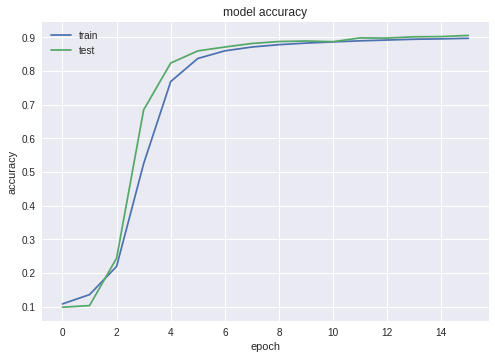

In [109]:
plt.plot(history_softmax.history['acc'])
plt.plot(history_softmax.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Cross-check loss for softmax activation

In [93]:
# Check the loss calculated by Keras
eval = model.evaluate(validation_images[1:2], validation_labels[1:2])
print('loss', eval[0])
print ('')
p = model.predict(validation_images[1:2])
print (p)
print ('')
print(validation_labels[1:2])

1/1 [==============================] - 0s 5ms/step
loss 0.07472395896911621

[[0.00705532 0.00066146 0.92799973 0.00882159 0.00000039 0.02149387
  0.02625666 0.00000012 0.00771000 0.00000096]]

[[0.00000000 0.00000000 1.00000000 0.00000000 0.00000000 0.00000000
  0.00000000 0.00000000 0.00000000 0.00000000]]


In [94]:
# Calculate cross-entropy loss on our own
loss = 0.0
for i in range(10):
    #print (validation_labels[0, i])
    #print (p[0, i])
    loss += - validation_labels[1, i] * np.log(p[0, i])
print (loss)

0.07472383230924606
